In [1]:
from maelzel.core import *
from maelzel.scoring import logger as sclogger

cfg = getConfig()
# cfg['quant.debug'] = False
# sclogger.setLevel('DEBUG')

end of score.		   overall amps:      0.0
	   overall samples out of range:        0
0 errors in performance


‹4C 4E 1♩ offset=0.5› 1/2 1/2 1/2
4D:1♩:gliss=4G None 3/2 3/2
4F:0.333♩ None 5/2 5/2
4F:0.667♩ None 17/6 17/6


Chain([‹4C 4E 1♩ offset=0.5›, 4D:1♩:gliss=4G, Chain([4F:0.333♩, 4F:0.667♩])])
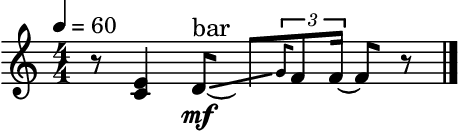

In [2]:
from maelzel.core import *
chain = Chain([
    "4C,4E:1:offset=0.5",
    "4D:1:mf:label=bar:gliss=4g",
     Chain(["4F:1/3", "4F:2/3"])
])

for ev, offset in chain.eventsWithOffset():
    print(ev, ev.offset, ev.absOffset(), offset)
chain

In [3]:
ch2 = chain.clone()
assert all(event.parent is not None for event, offset in ch2.eventsWithOffset())

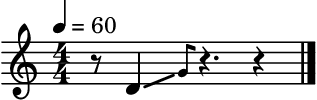

In [4]:
n = Note("4D", dur=1, offset=0.5, gliss="4G")
n.show()
# n.quantizedScore().dump()

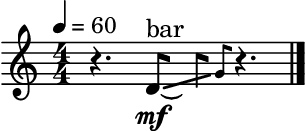

4D:1♩:gliss=4G


In [5]:
n = chain[1]
n.show()
n.dump()
# n.play(start=n.absoluteOffset())


Chain([Rest:0.5♩, ‹4C 4E 1♩›, 4D:1♩:gliss=4G, Chain([4F:0.333♩, 4F:0.667♩])])
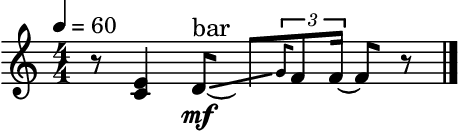

In [6]:

chain.fillGaps()
chain.dump()
chain.removeRedundantOffsets()
# chain.stack()
chain.dump()
chain

Chain([Rest:0.5♩, ‹4C 4E 1♩›, 4D:1♩:gliss=4G, 4F:0.333♩, 4F:0.667♩])
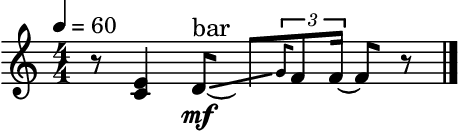

In [7]:
flat = chain.flat()
flat.removeRedundantOffsets()
flat.dump()
flat

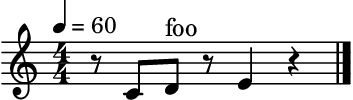

In [8]:
ch = Chain([
    '4C:0.5', 
    '4D:0.5:label=foo', 
    Chain(['4E:1:offset=0.5'])
], offset=0.5)
ch.show()


In [9]:
struct = ScoreStruct(r'''
2/4, 60
2/4, 120
3/4, 72
''')

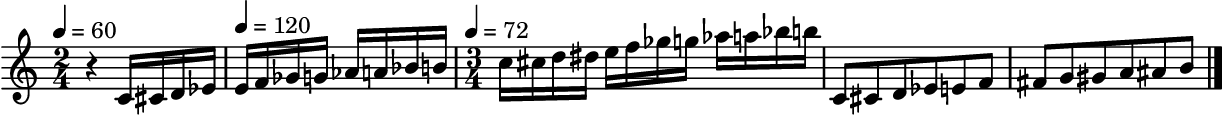

In [13]:
notes = [Note(m, 0.25) for m in range(60, 84)]
sc = Chain(notes, offset=1)
notes2 = [Note(m, 0.5) for m in range(60, 72)]
sc2 = Chain(notes2)
sc.append(sc2)
# sc.stack()
with struct:
    sc.play()
    sc.asVoice().show()


In [14]:
sc.dump()

In [15]:
with struct:
    sc.play()

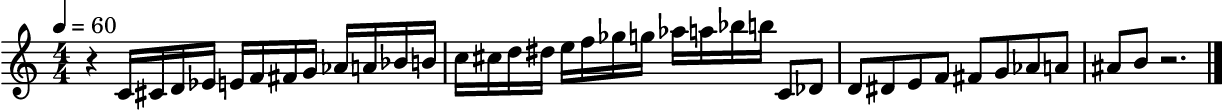

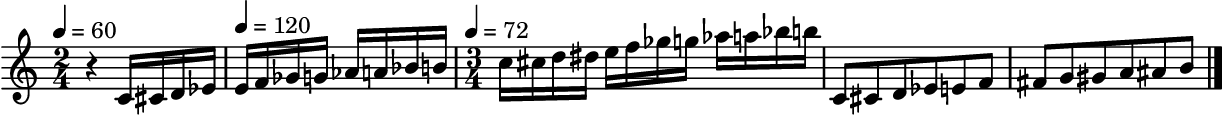

In [16]:
sc.flat().show()
with struct:
    sc.flat().show()

Score(4 voices)
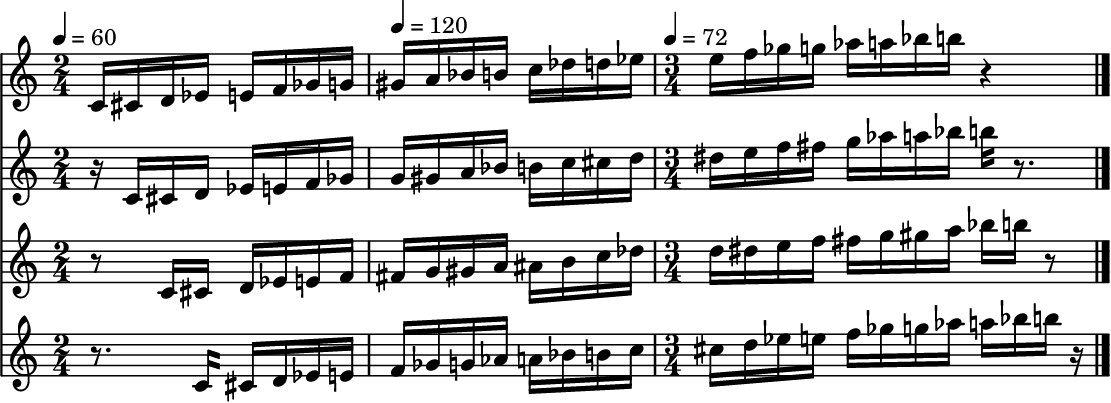

In [36]:
sco = Score(scorestruct=struct)

notes = [Note(m, 0.25) for m in range(60, 84)]
scale = Chain(notes)
sco.append(scale.asVoice())
sco.append(scale.asVoice().timeShift(0.25))
sco.append(scale.asVoice().timeShift(1/2))
sco.append(scale.asVoice().timeShift(F(3, 4)))
assert all(voice.parent is sco for voice in sco.voices)
sco

In [24]:
sco[0][0].setPlay(instr='saw', gain=0.1, position=0)
sco[0][3].setPlay(instr='saw', gain=0.1, position=1)
sco.play(position=0.5)


Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=96)
    Synth(𝍪 preset:saw=502.0008 start=129.225 dur=0.250 p4=0 kpos=0.1 kgain=19 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 klag=0 kcutoffratio=3 kfilterq=0 p19=60 p20=0.515178 p21=0.25 p22=60 …)
    Synth(𝍪 preset:.piano=501.0428 start=129.475 dur=0.250 p4=0.5 kpos=1 kgain=18 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=61 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0429 start=129.725 dur=0.250 p4=0.5 kpos=1 kgain=18 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=62 p19=0.515178 …)
    Synth(𝍪 preset:saw=502.0009 start=129.975 dur=0.250 p4=1 kpos=0.1 kgain=19 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 klag=0 kcutoffratio=3 kfilterq=0 p19=63 p20=0.515178 p21=0.25 p22=63 …)
    Synth(𝍪 preset:.piano=501.043 start=130.225 dur=0.250 p4=0.5 kpos=1 kgain=18 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=64 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0431 start=130.475 dur=0.250 p4=0.5 kpos=1 kgain=18 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=65 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0432 start=130.725 dur=0.250 p4=0.5 kpos=1 kgain=18 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=66 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0433 start=130.975 dur=0.250 p4=0.5 kpos=1 kgain=18 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=67 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0434 start=131.225 dur=0.125 p4=0.5 kpos=1 kgain=18 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=68 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0435 start=131.350 dur=0.125 p4=0.5 kpos=1 kgain=18 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=69 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0436 start=131.475 dur=0.125 p4=0.5 kpos=1 kgain=18 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=70 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0437 start=131.600 dur=0.125 p4=0.5 kpos=1 kgain=18 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=71 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0438 start=131.725 dur=0.125 p4=0.5 kpos=1 kgain=18 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=72 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0439 start=131.850 dur=0.125 p4=0.5 kpos=1 kgain=18 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=73 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.044 start=131.975 dur=0.125 p4=0.5 kpos=1 kgain=18 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=74 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0441 start=132.100 dur=0.125 p4=0.5 kpos=1 kgain=18 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=75 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0442 start=132.225 dur=0.208 p4=0.5 kpos=1 kgain=18 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=76 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0443 start=132.433 dur=0.20

In [25]:
v = sco.voices[2]
v.scorestruct()

Meas. Index,Timesig,Tempo (quarter note),Label,Rehearsal,Barline
0,2/4,60,,,
1,2/4,120,,,
2,3/4,72,,,
3,(3/4),,,,
4,(3/4),,,,
...,,,,,


In [26]:
sco.activeScorestruct()

Meas. Index,Timesig,Tempo (quarter note),Label,Rehearsal,Barline
0,2/4,60,,,
1,2/4,120,,,
2,3/4,72,,,
3,(3/4),,,,
4,(3/4),,,,
...,,,,,


In [27]:
sco.play(gain=0.5, sustain=0.1)

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=96)
    Synth(𝍪 preset:saw=502.001 start=140.563 dur=0.350 p4=0 kpos=0.1 kgain=19 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 klag=0 kcutoffratio=3 kfilterq=0 p19=60 p20=0.515178 p21=0.25 p22=60 …)
    Synth(𝍪 preset:.piano=501.0522 start=140.813 dur=0.350 p4=0.5 kpos=0.5 kgain=18 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=61 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0523 start=141.063 dur=0.350 p4=0.5 kpos=0.5 kgain=18 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=62 p19=0.515178 …)
    Synth(𝍪 preset:saw=502.0011 start=141.313 dur=0.350 p4=1 kpos=0.1 kgain=19 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 klag=0 kcutoffratio=3 kfilterq=0 p19=63 p20=0.515178 p21=0.25 p22=63 …)
    Synth(𝍪 preset:.piano=501.0524 start=141.563 dur=0.350 p4=0.5 kpos=0.5 kgain=18 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=64 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0525 start=141.813 dur=0.350 p4=0.5 kpos=0.5 kgain=18 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=65 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0526 start=142.063 dur=0.350 p4=0.5 kpos=0.5 kgain=18 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=66 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0527 start=142.313 dur=0.350 p4=0.5 kpos=0.5 kgain=18 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=67 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0528 start=142.563 dur=0.225 p4=0.5 kpos=0.5 kgain=18 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=68 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0529 start=142.688 dur=0.225 p4=0.5 kpos=0.5 kgain=18 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=69 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.053 start=142.813 dur=0.225 p4=0.5 kpos=0.5 kgain=18 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=70 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0531 start=142.938 dur=0.225 p4=0.5 kpos=0.5 kgain=18 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=71 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0532 start=143.063 dur=0.225 p4=0.5 kpos=0.5 kgain=18 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=72 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0533 start=143.188 dur=0.225 p4=0.5 kpos=0.5 kgain=18 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=73 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0534 start=143.313 dur=0.225 p4=0.5 kpos=0.5 kgain=18 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=74 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0535 start=143.438 dur=0.225 p4=0.5 kpos=0.5 kgain=18 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=75 p19=0.515178 …)
    Synth(𝍪 preset:.piano=501.0536 start=143.563 dur=0.308 p4=0.5 kpos=0.5 kgain=18 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 p18=76 p19=0.515178 …)
    Synth(𝍪 preset:.piano=5

5D♯:0.25♩
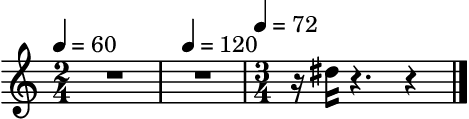

In [28]:
sco.voices[2].eventAt((2, 0.25))

In [42]:
v = sco.voices[2]
print(v.scorestruct())
v.dump()
events = v.eventsBetween((2, 0.25), (2, 0.8))
for ev in events:
    print(ev)

ScoreStruct([2/4@60, 2/4@120, 3/4@72, 3/4, 3/4])


5D♯:0.25♩
5E:0.25♩
5F:0.25♩


Chain([5D♯:0.25♩, 5E:0.25♩, 5F:0.25♩])
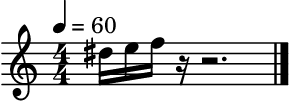

In [43]:
subch = Chain(events)
subch

In [44]:
v2 = v.copy()
print(v2.scorestruct())
v2.dump()
#v2.stack()
#v2.eventsBetween((2, 0.25), (2, 0.8))

None


In [19]:
struct.asBeat((2, 0.25))

Fraction(17, 4)

In [10]:
struct.locationToBeat(2, 0.25)

Fraction(17, 4)

In [12]:
struct.asBeat((2, 0.25))

Fraction(17, 4)

In [1]:
v = sco.voices[2]

NameError: name 'sco' is not defined

In [41]:
v.eventsWithOffset((2, 0.25), (2, 1))

[]

In [40]:
v._cachedEventsWithOffset.clear()

In [ ]:
v.ev